<a href="https://colab.research.google.com/github/Benider/Coursera_Capstone/blob/master/Coursera_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction/Business Problem

To help reduce deaths caused by car accidents, governements must think of innovative ways to prevent such problems. Luckily, we live in an era where computers have the power not only to do high computations, bt also help predict the likelyhood of certain outcomes with the help of Machine Learning.

This project will be a response to the car accidents problem and, hopefully, a first step to reduce road death with the help of machines given the current weather, road and visibility conditions.

# Exploring the Data

### Getting to know the Data

Let us first import the dataset from the given url

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's explore our target value!

In [25]:
df.SEVERITYCODE.value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In this data set, we see that the SEVERITYCODE ranges between 1 and 2. Wich means given the meta data : 


1.   prop damage
2.   injury


In [27]:
df.SEVERITYDESC.value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


### Feature selection

Now, lets check the columns in the dataset to choose our features for the modeling section.

In [28]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

From this list, the attributes that I'll use are : 

*   **SPEEDING** : Whether or not speeding was a factor in the collision
*   **WEATHER** : weather at the time of crash
*   **ROADCOND** : road condition at the time of crash
*   **LIGHTCOND** : light conditions at the time of crash
*   **INATTENTIONIND** : whether the driver was distracted
*   **UNDERINFL** : whether the driver was under the influence of drugs or alcohol

And of course, the target values is :
*   **SEVERITYCODE** : corresponds to the severity of the collision



In [30]:
list_of_features = ['SEVERITYCODE', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'UNDERINFL']

In [52]:
data = df[list_of_features]
data.head()

,SEVERITYCODE,SPEEDING,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL
0,2,NaN,Overcast,Wet,Daylight,NaN,N
1,1,NaN,Raining,Wet,Dark - Street Lights On,NaN,0
2,1,NaN,Overcast,Dry,Daylight,NaN,0
3,1,NaN,Clear,Dry,Daylight,NaN,N
4,2,NaN,Raining,Wet,Daylight,NaN,0


### Handling mising values

let's explore missing values

In [35]:
data.isna().any()

SEVERITYCODE      False
SPEEDING           True
WEATHER            True
ROADCOND           True
LIGHTCOND          True
INATTENTIONIND     True
UNDERINFL          True
dtype: bool

All the features have missing values!

Let's us explore more.

In [36]:
data.isna().sum()

SEVERITYCODE           0
SPEEDING          185340
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
INATTENTIONIND    164868
UNDERINFL           4884
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SPEEDING        9333 non-null    object
 2   WEATHER         189592 non-null  object
 3   ROADCOND        189661 non-null  object
 4   LIGHTCOND       189503 non-null  object
 5   INATTENTIONIND  29805 non-null   object
 6   UNDERINFL       189789 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.4+ MB


Since speeding has many missing values, let's drop it

In [53]:
data.drop('SPEEDING', axis=1, inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL
0,2,Overcast,Wet,Daylight,NaN,N
1,1,Raining,Wet,Dark - Street Lights On,NaN,0
2,1,Overcast,Dry,Daylight,NaN,0
3,1,Clear,Dry,Daylight,NaN,N
4,2,Raining,Wet,Daylight,NaN,0


Now, lets fill missing values with most frequent values!

In [54]:
for i in ['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'UNDERINFL']:
  data[i].fillna(data[i].value_counts().index[0], inplace=True)

data.isna().any()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


SEVERITYCODE      False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
INATTENTIONIND    False
UNDERINFL         False
dtype: bool

### Data visualisation

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [67]:
sns.set(font_scale=1.4)

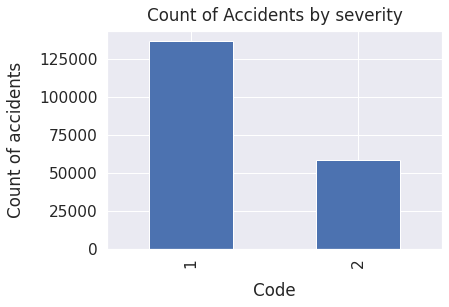

In [69]:
df.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel("Code", labelpad=14)
plt.ylabel("Count of accidents", labelpad=14)
plt.title("Count of Accidents by severity", y=1.02);

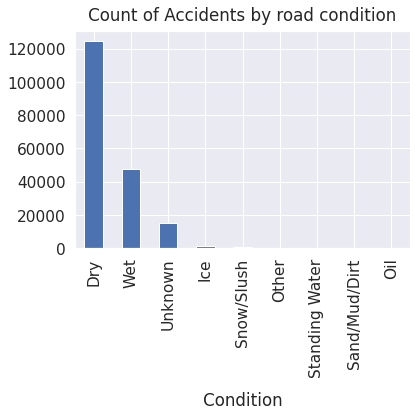

In [70]:
df.ROADCOND.value_counts().plot(kind='bar')
plt.xlabel("Condition", labelpad=14)
plt.title("Count of Accidents by road condition", y=1.02);

### Formating the Data

Great, Now lets Get de Data to the correct format to do machine learning

In [71]:
data = pd.get_dummies(data=data)

Now we can move on to modeling!